# Unspuervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Clustering

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X =data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

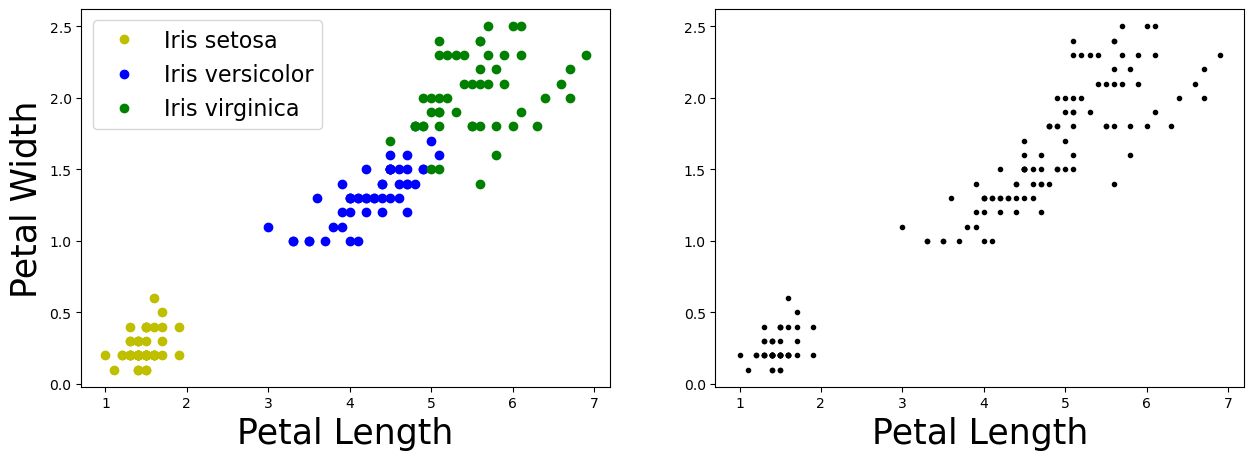

In [4]:
parameters = {'axes.labelsize': 25, 'axes.titlesize': 35}
plt.rcParams.update(parameters)

_, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=100)

axes[0].plot(X[y == 0, 2], X[y == 0, 3], "yo", label="Iris setosa")
axes[0].plot(X[y == 1, 2], X[y == 1, 3], "bo", label="Iris versicolor")
axes[0].plot(X[y == 2, 2], X[y == 2, 3], "go", label="Iris virginica")

axes[0].set(xlabel="Petal Length", ylabel="Petal Width")
axes[0].legend(fontsize=16)

axes[1].scatter(X[:, 2], X[:, 3], c="k", marker=".")
axes[1].set(xlabel="Petal Length")

plt.show()

# GMM Gaussian Mixure Model
A Gaussian mixture model can actually seperate these clusters well:

(4  feats: Petal / Sepal & width / length)

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
gm = GaussianMixture(n_components=3,random_state=42)
# 3 species?

In [7]:
y_pred = gm.fit_predict(X)

Map each cluster to a class. 
 
 Instead of hard coding the mapping (as is done in the book, for simplicity), we will pick the most common class for each cluster (using the `scipy.stats.mode()` function):

In [8]:
from scipy import stats

In [9]:
mapping = {}
for class_id in np.unique(y):
    mode,_= stats.mode(y_pred[y == class_id])
    mapping[mode[0]] = class_id

mapping # ?? 

{1: 0, 2: 1, 0: 2}

In [10]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

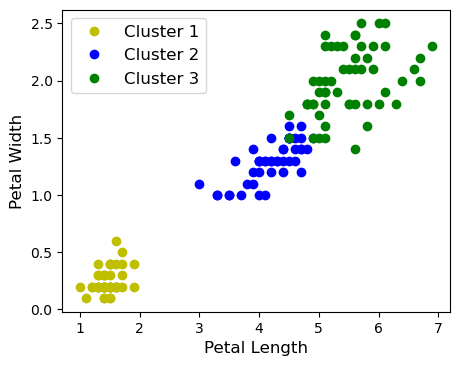

In [11]:
parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)

_, ax = plt.subplots(figsize=(5, 4), dpi=100)

ax.plot(X[y_pred == 0, 2], X[y_pred == 0, 3], "yo", label="Cluster 1")
ax.plot(X[y_pred == 1, 2], X[y_pred == 1, 3], "bo", label="Cluster 2")
ax.plot(X[y_pred == 2, 2], X[y_pred == 2, 3], "go", label="Cluster 3")

ax.set(xlabel="Petal Length", ylabel="Petal Width")
ax.legend(fontsize=12)

plt.show()

In [12]:
np.sum(y_pred == y) / len(y)

0.9666666666666667

 **Note**: the results in this notebook may differ slightly from the book. This is because algorithms can sometimes be tweaked a bit between Scikit-Learn versions.

# K-means

In [13]:
from sklearn.datasets import make_blobs

In [14]:
blob_centers = np.array([[0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-2.8, 2.8],
                         [-2.8, 1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [15]:
X, y = make_blobs(n_samples=2000,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=7)


In [16]:
def plot_clusters(X, y=None):
    _ ,ax = plt.subplots(figsize=(8, 4), dpi=100)
    ax.scatter(X[:,0],X[:,1],c=y,s=1)
    ax.set(xlabel='$x_1$',ylabel='$x_2$')

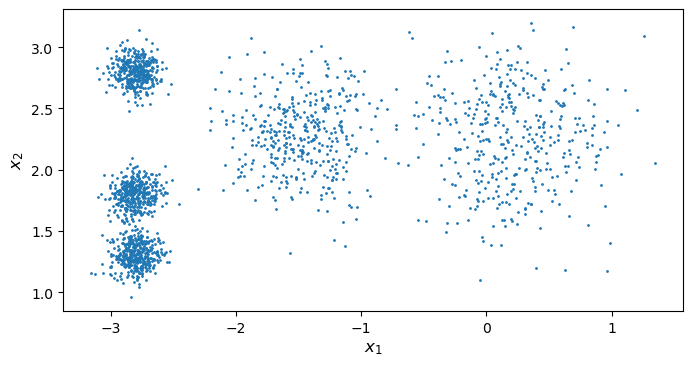

In [17]:
 parameters = {'axes.labelsize': 12, 'axes.titlesize': 12}
plt.rcParams.update(parameters)


plot_clusters(X)
plt.show()

## Fit and predict

Train a K-means cluster on this dataset

In [18]:
from sklearn.cluster import KMeans

In [19]:
k = 5 # later

In [20]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [21]:
y_pred = kmeans.fit_predict(X)

Each instance was assigned to onee of the five clusters.

In [22]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [23]:
y_pred == kmeans.labels_

array([ True,  True,  True, ...,  True,  True,  True])

In [24]:
y_pred is kmeans.labels_

True

In [25]:
# find the cluster centers
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [26]:
# try some prediction:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

# Decision Boundaries

In [35]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)


def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='o',
                s=35,
                linewidth=8,
                color=circle_color,
                zorder=10,
                alpha=0.9)
    plt.scatter(centroids[:, 0],
                centroids[:, 1],
                marker='x',
                s=2,
                lws=12,
                color=cross_color,
                zorder=11,
                alpha=1)


def plot_decision_boundaries(clusterer,
                             X,
                             resolution=1000,
                             show_centroids=True,
                             show_xlabels=True,
                             show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z,
                 extent=(mins[0], maxs[0], mins[1], maxs[1]),
                 cmap="Pastel2")
    plt.contour(Z,
                extent=(mins[0], maxs[0], mins[1], maxs[1]),
                lws=1,
                colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)



/var/folders/dv/qnpc2tm905n3c2nrmq03c65w0000gn/T/ipykernel_27291/949487443.py:42: UserWarning: The following kwargs were not used by contour: 'lws'
  plt.contour(Z,


AttributeError: 'PathCollection' object has no property 'lws'

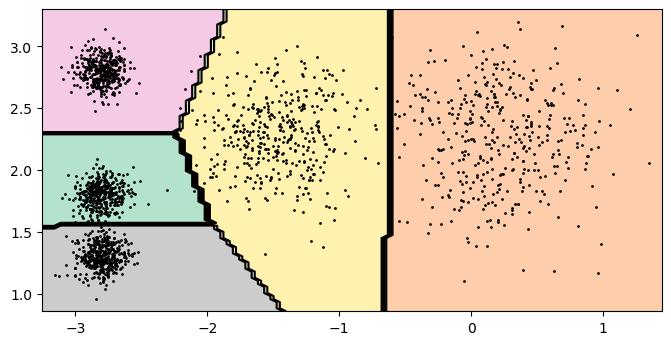

In [34]:
plt.figure(figsize=(8, 4), dpi=100)
plot_decision_boundaries(kmeans, X,resolution=100)
plt.show()